In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset

data= pd.read_csv('c:/datasets/fuel.csv')

In [3]:
data.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [4]:
#checking if there is any missing value

data.isnull().sum()

Unnamed: 0                        0
record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
#shape of the data

data.shape

(29523, 12)

In [6]:
#checking the frequecy of the values in the colunm fuel_unit

data['fuel_unit'].value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

In [7]:
#creating a new dataset with no missing value

new_data = data.dropna()

In [8]:
#creating a new dataset after removing a non-important column

fuel = new_data.drop('Unnamed: 0', axis = 1)
fuel.shape

(29343, 11)

In [9]:
fuel.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [10]:
#describing the new dataset called fuel

fuel.describe(include = 'all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29343,29343.000000,29343.000000,29343,29343,29343,2.934300e+04,29343.000000,29343.000000,2.934300e+04,29343.000000
unique,29343,NaN,NaN,2307,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2000_12_135_0_14,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11433,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.507037,2005.819105,NaN,NaN,NaN,2.609171e+06,8.477481,209.756592,9.230343e+02,18.543975
std,NaN,74.241226,7.019855,NaN,NaN,NaN,8.798699e+06,10.537478,2863.194789,6.898652e+04,2097.367750
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.375050e+04,1.024000,5.230000,3.793000e+00,1.950000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.524640e+05,5.763072,26.039000,1.749000e+01,4.140000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424218e+06,17.000000,47.172000,4.220850e+01,7.752000


In [11]:
#calcutating the skewness and kurtosis

print(fuel.kurt());
print ()
print(fuel.skew())

utility_id_ferc1                    1.093933
report_year                        -1.144744
fuel_qty_burned                   587.914077
fuel_mmbtu_per_unit                56.747388
fuel_cost_per_unit_burned         482.274327
fuel_cost_per_unit_delivered    11693.308259
fuel_cost_per_mmbtu             29341.963796
dtype: float64

utility_id_ferc1                  0.608528
report_year                       0.005427
fuel_qty_burned                  14.152574
fuel_mmbtu_per_unit               4.144960
fuel_cost_per_unit_burned        19.726647
fuel_cost_per_unit_delivered    104.693562
fuel_cost_per_mmbtu             171.293451
dtype: float64


In [12]:
#getting the correlation of the dataset

corr=fuel.corr()

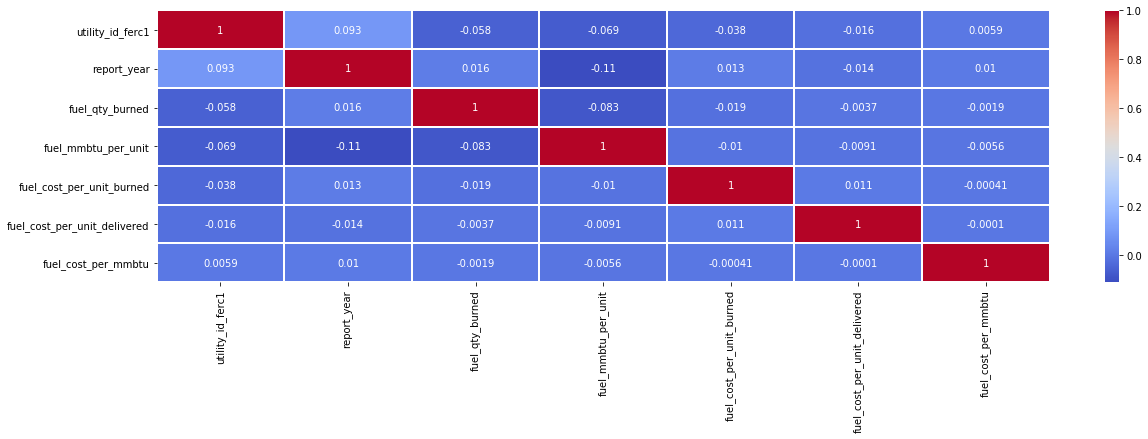

In [13]:
#plotting a heatmap of the correlation values

f, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr,cmap='coolwarm',linewidths=1.0, annot=True)


In [14]:
#creating a new dataset contaning report year and fuel cost per unit delevered

fuel_year = pd.DataFrame([fuel['report_year'],fuel['fuel_cost_per_unit_delivered']])
new1 =  fuel_year.T
new1

,report_year,fuel_cost_per_unit_delivered
0,1994.0,18.53
1,1994.0,18.53
2,1994.0,38.12
3,1994.0,45.99
4,1994.0,2.77
...,...,...
29518,2018.0,4.78
29519,2018.0,3.65
29520,2018.0,4.77
29521,2018.0,14.76


In [15]:
#grouping by report year and summing the fuel cost per unit delivered using each year

year_new = new1.groupby('report_year', as_index = False).sum()
new = pd.DataFrame(year_new)
new

,report_year,fuel_cost_per_unit_delivered
0,1994.0,7.833967e+04
1,1995.0,3.897922e+04
2,1996.0,1.000587e+07
3,1997.0,1.218737e+07
4,1998.0,3.178039e+05
5,1999.0,2.677604e+04
6,2000.0,1.352862e+06
7,2001.0,8.132361e+04
8,2002.0,5.723706e+04
9,2003.0,6.737100e+04


In [16]:
new.fuel_cost_per_unit_delivered.max()

12187365.310000015

In [17]:
#creating a new dataset contaning report year and fuel cost per unit burned

fuel_year = pd.DataFrame([fuel['report_year'],fuel['fuel_cost_per_unit_burned']])
new2 =  fuel_year.T
new2

,report_year,fuel_cost_per_unit_burned
0,1994.0,18.59
1,1994.0,18.58
2,1994.0,39.72
3,1994.0,47.21
4,1994.0,2.77
...,...,...
29518,2018.0,4.78
29519,2018.0,3.65
29520,2018.0,4.77
29521,2018.0,3.06


In [18]:
#grouping by report year and summing the fuel cost per unit burned each year

burned = new2.groupby('report_year', as_index = False).sum()
burned = pd.DataFrame(burned)
burned

,report_year,fuel_cost_per_unit_burned
0,1994.0,262890.587
1,1995.0,425313.683
2,1996.0,86273.465
3,1997.0,163518.442
4,1998.0,140118.249
5,1999.0,125998.485
6,2000.0,326455.133
7,2001.0,180251.278
8,2002.0,121803.224
9,2003.0,149094.852
